# NumPy Basics: Arrays and Vectorized Computation

Numerical Python 的简称，是Python科学计算的基础包。

NumPy的主要对象是**同类型**元素的多维数组。

其所有的元素都是一种类型、通过一个正整数元组索引的元素表格。
本节的内容包括array数据的：
+ 生成
+ 选取
+ 数据处理
+ 运算等

+ 导入numpy, 设置数据显示的格式，设置在notebook中显示图形

In [1]:
from numpy.random import randn
import numpy as np

# 设置NumPy对象的显示的格式,
np.set_printoptions(precision=4, suppress=True)

%matplotlib inline 

In [2]:
a=np.array([34.23534,0.1**30])
a


array([34.2353,  0.    ])

##  NumPy 多维数值

在NumPy中维度(dimensions)叫做轴(axes)。

+   [1, 2, 3] 是1$\times$3的数组 

+ [[ 1., 0., 0.], [ 0., 1., 2.]]是2$\times$3的数组， 它有两个维度，第一个维度长度为2,第二个维度长度为3. 



+ 下面的例子抽取一个$2\times 3$的数组，并进行计算。 randn函数从标准正态分布抽取随机数。

In [3]:
data = randn(2, 3) 
#data

In [4]:
print(data * 10,end="\n\n")
print(data + data)

[[-9.2732  5.3383 -5.9973]
 [13.3697 -2.4477 11.0909]]

[[-1.8546  1.0677 -1.1995]
 [ 2.6739 -0.4895  2.2182]]


In [5]:
data.shape 

(2, 3)

In [6]:
data.dtype

dtype('float64')

### 产生数组变量

+ 整数数组序列,np.arange

In [7]:
print(np.arange(15),end="\n\n")
print(np.arange(2,15),end="\n\n")
print(np.arange(2,15,2),end="\n\n")
print(np.arange(2,15,1.5),end="\n\n")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

[ 2  3  4  5  6  7  8  9 10 11 12 13 14]

[ 2  4  6  8 10 12 14]

[ 2.   3.5  5.   6.5  8.   9.5 11.  12.5 14. ]



+ 用list产生

In [8]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [9]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
arr2.shape

(2, 4)

In [11]:
# reshape可以改变维度
arr2.reshape((1, 8)).reshape(4,2)# reshape((1, 8))和reshape(1, 8)都可以

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

+ 一些常用的矩阵和向量

In [12]:
np.zeros(10,dtype="int")
#np.empty(10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [14]:
np.identity(2)
np.eye(2,3)

array([[1., 0., 0.],
       [0., 1., 0.]])

### 多维数组的类型 

+ np.array的数据类型可以指定，如果没有指定，会自动推断

In [14]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr = np.array([1, 2, 3, 4, 5])
arr1.dtype,arr2.dtype,arr.dtype

(dtype('float64'), dtype('int32'), dtype('int32'))

+ 转换数据类型

In [15]:
# 整数转换为浮点
float_arr = arr.astype(np.float64)

float_arr.dtype,float_arr

(dtype('float64'), array([1., 2., 3., 4., 5.]))

In [16]:
# 浮点转换为整数
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [17]:
# 字符转浮点
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=str)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

###  数组和标量的运算
数组的+，-，*,/为对应位置的点对点运算

In [18]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [19]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [21]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

###  索引和切片

In [22]:
arr = np.arange(10)
arr[5]

5

In [23]:
arr[5:8]

array([5, 6, 7])

+ 5:8表示[5,6,7]

+  而list,array等python对象位置索引从0开始的，其实是引用第6，7，8个元素。

In [24]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

+ 切片传地址; 
+ 注意这里和list有区别,一般数列list的切片拷贝生成新的对象

In [25]:
arr=np.arange(10)
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,     5, 12345,     7,     8,
           9])

In [26]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [27]:
arr_slice=6400
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

+ list 切片拷贝生成新的对象

In [28]:
a_list=list(range(10))
list_slice = a_list[5:8]
list_slice[1] = 12345
a_list 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
a=[1,2,3,[1,2]]
b=a[3]
b[1]=1000


In [30]:
a

[1, 2, 3, [1, 1000]]

+ 二维数组的引用和切片

In [31]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)
"几种不同的引用方式:",arr2d[2],arr2d[:][1],arr2d[:,1],arr2d[0][2],arr2d[0, 2]
#比较 arr2d[:][1] 和 arr2d[:,1]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


('几种不同的引用方式:', array([7, 8, 9]), array([4, 5, 6]), array([2, 5, 8]), 3, 3)

In [32]:
# 二维数组切片也传地址
b=arr2d[2]
b1=arr2d[0][:2]
b2=arr2d[0][:1]

b1[:]=1000
b2[:]=999
b[:]=30
arr2d

array([[ 999, 1000,    3],
       [   4,    5,    6],
       [  30,   30,   30]])

+ 3维数组的引用和切片

+ 三层嵌套[],每层一个维度

In [33]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [34]:
arr3d.shape

(2, 2, 3)

In [35]:
"第一维：",arr3d[0],"第二维：",arr3d[0][0],"第三维：",arr3d[0][0][0]

('第一维：',
 array([[1, 2, 3],
        [4, 5, 6]]),
 '第二维：',
 array([1, 2, 3]),
 '第三维：',
 1)

+ 数组拷贝
+ 要生成新的对象(传递数值)，而不是传递地址，需要用到copy函数

In [36]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)
old_values=arr2d.copy()
old_values 

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
arr2d[0][:] =999
print(arr2d)
print("copy:",old_values)

[[999 999 999]
 [  4   5   6]
 [  7   8   9]]
copy: [[1 2 3]
 [4 5 6]
 [7 8 9]]


+ 利用切片索引

In [38]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [39]:
arr2d
arr2d[:2]

array([[999, 999, 999],
       [  4,   5,   6]])

In [40]:
#arr2d[1, :2]
arr2d

array([[999, 999, 999],
       [  4,   5,   6],
       [  7,   8,   9]])

In [41]:
arr2d[:2, 1:] = 0
arr2d

array([[999,   0,   0],
       [  4,   0,   0],
       [  7,   8,   9]])

###  利用布尔值索引

In [42]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
print(names,end="\n\n")
data

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']



array([[-0.012 , -0.2961,  0.0709,  0.6784],
       [-0.9246, -0.7337, -0.7366,  1.7757],
       [-0.7274, -0.8158,  1.2134,  0.2037],
       [ 0.5653, -0.7297, -0.4079,  1.2448],
       [-0.2561, -0.1402,  1.6304, -1.204 ],
       [ 0.2072,  0.3384, -1.5368,  0.5322],
       [-0.0518, -1.6839,  0.1218,  0.3066]])

In [43]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [44]:
data[names == 'Bob']

array([[-0.012 , -0.2961,  0.0709,  0.6784],
       [ 0.5653, -0.7297, -0.4079,  1.2448]])

In [48]:
data[names == 'Bob', 2:]

array([[ 0.0709,  0.6784],
       [-0.4079,  1.2448]])

In [47]:
data[names == 'Bob', 3]

array([0.6784, 1.2448])

In [46]:
names != 'Bob'
data[names != 'Bob']

array([[-0.9246, -0.7337, -0.7366,  1.7757],
       [-0.7274, -0.8158,  1.2134,  0.2037],
       [-0.2561, -0.1402,  1.6304, -1.204 ],
       [ 0.2072,  0.3384, -1.5368,  0.5322],
       [-0.0518, -1.6839,  0.1218,  0.3066]])

In [49]:
mask = (names == 'Bob') | (names == 'Will')
mask 

array([ True, False,  True,  True,  True, False, False])

In [50]:
data[mask]

array([[-1.1402,  0.3249, -0.9374,  1.6568],
       [ 0.42  , -0.003 , -0.0187,  1.4302],
       [ 0.9449, -1.3165,  0.7273,  0.5556],
       [ 0.5361,  0.1999, -1.738 ,  0.1898]])

In [51]:
data

array([[-1.1402,  0.3249, -0.9374,  1.6568],
       [ 0.2538,  1.0188,  0.9522,  0.4247],
       [ 0.42  , -0.003 , -0.0187,  1.4302],
       [ 0.9449, -1.3165,  0.7273,  0.5556],
       [ 0.5361,  0.1999, -1.738 ,  0.1898],
       [ 2.1326,  0.6087,  0.4001, -0.3303],
       [-0.6332, -0.4483,  1.7913, -0.3532]])

In [52]:
data<0

array([[ True, False,  True, False],
       [False, False, False, False],
       [False,  True,  True, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True],
       [ True,  True, False,  True]])

In [53]:
data[data < 0] = 0
#data
data

array([[0.    , 0.3249, 0.    , 1.6568],
       [0.2538, 1.0188, 0.9522, 0.4247],
       [0.42  , 0.    , 0.    , 1.4302],
       [0.9449, 0.    , 0.7273, 0.5556],
       [0.5361, 0.1999, 0.    , 0.1898],
       [2.1326, 0.6087, 0.4001, 0.    ],
       [0.    , 0.    , 1.7913, 0.    ]])

In [54]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.2538, 1.0188, 0.9522, 0.4247],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [2.1326, 0.6087, 0.4001, 0.    ],
       [0.    , 0.    , 1.7913, 0.    ]])

###   花式索引

利用整数数组进行索引，该引用拷贝数据。

In [55]:
np.empty((8, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [56]:
?np.empty

In [57]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr 

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [58]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [59]:
arr[[-3, -5, -7]]
#- 表示倒序

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [60]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [61]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [62]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

###  转置

In [63]:
arr = np.arange(15).reshape((3, 5)) 
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [64]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[14.1947,  2.2394,  0.5736],
       [ 2.2394, 14.1425,  4.0449],
       [ 0.5736,  4.0449, 11.2577]])

In [65]:
arr =np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

##  通用函数，快速的元素级数组函数
 

In [66]:
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [67]:
x = randn(8)
y = randn(8)
print(x)
print(y)
np.maximum(x, y) #  x,y生成一个2维元组，对应位置取x,y的最大值

[-0.9229 -0.5716 -0.216   1.6385  0.1752  2.3351 -1.1186  0.1469]
[-0.2739  0.212   2.1871 -0.4665 -1.5999 -0.533   0.758   0.0536]


array([-0.2739,  0.212 ,  2.1871,  1.6385,  0.1752,  2.3351,  0.758 ,
        0.1469])

In [68]:
arr = randn(7) * 5
print(arr)
np.modf(arr)

[ 6.6242  5.9922 -6.1625 -1.3572 -4.0309 -0.192   0.2504]


(array([ 0.6242,  0.9922, -0.1625, -0.3572, -0.0309, -0.192 ,  0.2504]),
 array([ 6.,  5., -6., -1., -4., -0.,  0.]))

## 使用数组处理数据

In [69]:
#meshgrid生成网格
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [70]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [71]:
from matplotlib.pyplot import imshow, title

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

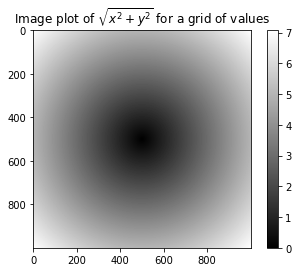

In [72]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

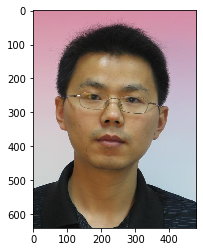

In [73]:
#import skimage
from skimage import io
#p=io.imread("E:\\teaching\\2017datafin\\notebook\\data\\new sheet_002.jpg")
p=io.imread("https://www.math.pku.edu.cn/images/content/2018-06/20180627113001257500.png")
plt.imshow(p)

In [74]:
p[0,0,:]

array([212, 140, 160], dtype=uint8)

In [75]:
p.shape

(640, 480, 3)

### 条件表达式,np.where

In [77]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [78]:
result = np.where(cond, xarr, yarr)  ## if cond return xarr else return yarr
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [79]:
arr = randn(4, 4)
arr
np.where(arr > 0, 2, -2)
np.where(arr > 0, 2, arr) # set only positive values to 2#

array([[-2.2628, -0.1367, -0.2525,  2.    ],
       [ 2.    , -1.1017,  2.    , -0.8155],
       [-0.8937,  2.    ,  2.    , -0.7483],
       [ 2.    ,  2.    , -0.4584, -0.9504]])

###  数学及统计函数

包括函数 sum, mean, std,var, min, max, argmin,argmax,cumsum,cumprod

In [80]:
arr = np.random.randn(5, 4) # normally-distributed data
arr.mean()
np.mean(arr)
arr.sum()

1.1933250007010607

In [81]:
print(arr)
print(arr.mean())
print(arr.mean(axis=0))
arr.sum(0)

[[-0.9574 -1.0011 -0.6515  0.5999]
 [ 0.7855 -0.545   0.4687 -1.3588]
 [ 1.0494 -0.9181 -0.8297  0.8352]
 [-1.8726 -0.7996  2.0656  0.57  ]
 [ 0.1973  2.4663  1.1504 -0.061 ]]
0.059666250035053034
[-0.1596 -0.1595  0.4407  0.1171]


array([-0.7979, -0.7975,  2.2035,  0.5853])

In [82]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(1)
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for boolean arrays

In [83]:
arr = randn(100)
(arr > 0).sum() # Number of positive values

56

In [84]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

### Sorting

In [85]:
arr = randn(8)
arr
arr.sort()
arr

array([-1.8357, -0.5654, -0.4681, -0.3186,  0.0174,  0.2757,  1.0585,
        1.4525])

In [86]:
arr = randn(5, 3)
print(arr)
arr.sort(0) ## 0每列排序，1，每行
arr

[[-0.6621  0.094  -0.215 ]
 [-0.1038  1.4129 -1.5703]
 [ 0.4892 -0.519  -2.3735]
 [-1.0194 -0.2635  0.9265]
 [-1.7469 -0.7444 -0.1948]]


array([[-1.7469, -0.7444, -2.3735],
       [-1.0194, -0.519 , -1.5703],
       [-0.6621, -0.2635, -0.215 ],
       [-0.1038,  0.094 , -0.1948],
       [ 0.4892,  1.4129,  0.9265]])

In [87]:
arr = randn(5, 3)
print(arr)
arr.sort(1) ## 0每列排序，1，每行排序
arr


[[-0.1067  0.1518  0.9811]
 [-0.3423  0.1179 -1.0129]
 [ 1.311   1.6698  0.5237]
 [-1.6356 -0.4388 -0.0383]
 [-0.9012 -0.5639  1.0817]]


array([[-0.1067,  0.1518,  0.9811],
       [-1.0129, -0.3423,  0.1179],
       [ 0.5237,  1.311 ,  1.6698],
       [-1.6356, -0.4388, -0.0383],
       [-0.9012, -0.5639,  1.0817]])

### Unique and other set logic

函数包括：unique(x),intersect1d(x,y),union1d(x,y),in1d(x,y),setdiff1d(x,y),setxor1d(x,y)

In [88]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

['Bob' 'Joe' 'Will']


array([1, 2, 3, 4])

In [89]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [90]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 数组的输入和输出

In [91]:
arr = np.arange(10)
np.save('some_array', arr)

In [92]:
a=np.load('some_array.npy')

In [93]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
#np.savez,多个数组
arch = np.load('D:\\teaching\\金融数据分析datafin\\data\\array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Saving and loading text files

In [95]:
!type data\array_ex.txt

-0.951266864671,-0.64723096535,1.09667101587,0.400586955639
-1.40858316447,0.643109396866,-1.55032379004,-0.463958033067
0.496607504203,-1.79963950946,0.622557557274,1.30738800961


In [96]:
arr = np.loadtxt('data/array_ex.txt', delimiter=',')
arr

array([[-0.9513, -0.6472,  1.0967,  0.4006],
       [-1.4086,  0.6431, -1.5503, -0.464 ],
       [ 0.4966, -1.7996,  0.6226,  1.3074]])

## Linear algebra

函数包括：diag,dot,trace,det,eig,inv,pinv,qr,svd,solve,lstsq

In [97]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
x.dot(y)  # equivalently np.dot(x, y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


array([[ 28.,  64.],
       [ 67., 181.]])

In [98]:
print(np.ones(3))
np.dot(x, np.ones(3))

[1. 1. 1.]


array([ 6., 15.])

numpy.linalg中有更多矩阵函数。

In [99]:
from numpy.linalg import inv, qr
X = randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-10.1771,  -2.4156,  -5.4164,   0.3527,   4.675 ],
       [  0.    ,  -2.942 ,   0.0771,   7.2492,   2.0642],
       [  0.    ,   0.    ,  -1.12  ,  -0.3438,  -1.7932],
       [  0.    ,   0.    ,   0.    ,  -6.5177,  -1.6572],
       [  0.    ,   0.    ,   0.    ,   0.    ,   0.6023]])

## Random number generation

seed,permutation,shuffle,rand,randit,randn,vinomial,normal,beta,chisquare,gamma,uniform等

In [100]:
samples = np.random.normal(size=(4, 4))
samples


array([[-0.19  ,  1.1841, -1.2091, -0.3499],
       [ 1.0611,  0.2964,  0.9105,  1.1028],
       [ 0.3708,  0.4728, -0.0538,  0.1022],
       [ 1.2508,  1.0427,  0.2224, -0.0882]])

## 作业

1.  给定一个二维数组，每行是一个向量。找出所有不同的行。
比如： 

```x = np.array([[1., 2., 3.], [4., 5., 6.],[1., 2., 3.], [4., 5., 6.]]),则
x[:2]，即x的第0,1行，array([[ 1.,  2.,  3.],[ 4.,  5.,  6.]])就是要找到行。
```

备注：请不要直接调用numpy.unique

2.  a).产生正态数据数据向量 Z,长度为T， 建立一个二维数组，使其第一行为 (Z[0],Z[1],Z[2])，然后每一行都后移一位 （因此最后一行为 (Z[T-3],Z[T-2],Z[T-1] );b). 计算每列数据的样本均值，方差，各列之间的协方差。
 
3. a). 随机生成一个1000行50列二维数组，每个元素等概率取值0，1，2，并将该数组按第1列递增和第2列递减对每行排序，即先按第一列递增排序，然后在第一列每组中， 按第二列递减排序。 b). 编一个函数sortbycols(data,cols,descending)，实现行排序。给定参数 data是二维数值，cols是数或list,给出需要排序的列，descending是布尔值或布尔向量，如果是一个布尔值，则所有列都按该顺序排，如果descending是和cols等长的list，则各列按descending给定的顺序排。
4.  熟悉学习numpy中的现金流函数, np.pv,np.fv,np.nper,np.pmt,np.rate, 然后编制一个函数，计算给定现金流(array)，利率(array),任意时刻(t)的现金价值。
5. stock_day21.PNG 是某股票最近一个月21个交易日收盘价的散点图。你能通过图形数据点回复价格数据并计算平均价格吗？给出你的计算方法和步骤，并编程实现。
 
 


In [56]:
data = [[1,2,3],[2,3,4],[4,1,5],[9,6,1],[5,2,4],[6,1,4]]
data.sort(key = lambda x:(x[2],x[1]))
data

[[9, 6, 1], [1, 2, 3], [6, 1, 4], [5, 2, 4], [2, 3, 4], [4, 1, 5]]

In [61]:
int(-2 * (True - 0.5)), int(-2 * (False - 0.5))

(-1, 1)

In [2]:
import numpy as np
def sortbycols(data, cols, descending=False):
    def sort_key(x):
        x_1 = list(np.array(x)[cols])
        if descending is True:
            des = [True for i in x_1]
        elif descending is False:
            des = [False for i in x_1]
        else:
            des = descending
        x_2 = [int(-2 * (des[i] - 0.5)) * x_1[i] for i in range(len(x_1))]
        return x_2
    data.sort(key = sort_key)
    return data

3(b)例子：

In [3]:
data = [[1,2,3],[2,3,4],[4,1,5],[9,6,1],[5,2,4],[6,1,4]]
sortbycols(data, [2, 1], False) # 先按第三列排序，相等的按第二列排序，都是升序
data

[[9, 6, 1], [1, 2, 3], [6, 1, 4], [5, 2, 4], [2, 3, 4], [4, 1, 5]]

In [69]:
data = [[1,2,3],[2,3,4],[4,1,5],[9,6,1],[5,2,4],[6,1,4]]
sortbycols(data, [2, 1], [False, True]) # 先按第三列排序，相等的按第二列排序，第二列是降序
data

[[9, 6, 1], [1, 2, 3], [2, 3, 4], [5, 2, 4], [6, 1, 4], [4, 1, 5]]

In [75]:
import numpy_financial as nf
?nf.fv

In [81]:
from skimage import io
pic = io.imread("stock_day21.png")
pic.shape

(645, 855, 3)

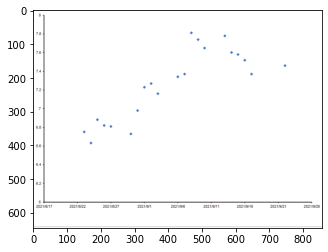

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pic)

In [91]:
for i in range(855):
    print(i, pic[:500, i].sum(), end="  ")
    if i % 5 == 4:
        print("\n", end="")

0 205566  1 382146  2 382146  3 382146  4 382146  
5 382146  6 382146  7 382146  8 382146  9 374290  
10 367756  11 363459  12 365749  13 366093  14 377412  
15 381635  16 378219  17 380201  18 368993  19 357696  
20 362151  21 357934  22 357854  23 375579  24 382146  
25 382146  26 382146  27 382146  28 382146  29 375018  
30 367890  31 168738  32 102714  33 137958  34 382146  
35 382146  36 382146  37 382146  38 382146  39 382146  
40 382146  41 382146  42 382146  43 382146  44 382146  
45 382146  46 382146  47 382146  48 382146  49 382146  
50 382146  51 382146  52 382146  53 382146  54 382146  
55 382146  56 382146  57 382146  58 382146  59 382146  
60 382146  61 382146  62 382146  63 382146  64 382146  
65 382146  66 382146  67 382146  68 382146  69 382146  
70 382146  71 382146  72 382146  73 382146  74 382146  
75 382146  76 382146  77 382146  78 382146  79 382146  
80 382146  81 382146  82 382146  83 382146  84 382146  
85 382146  86 382146  87 382146  88 382146  89 382146  
90

In [98]:
print(pic[:500, 190][300: 340])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [130 160 216]
 [ 68 114 196]
 [ 68 114 196]
 [ 68 114 196]
 [ 68 114 196]
 [ 68 114 196]
 [ 68 114 196]
 [ 68 114 196]
 [ 83 125 201]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]
